# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-"*40)


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-"*40)        
print("Data Retrieval Complete")
print("-"*40)



Beginning Data Retrieval
----------------------------------------
Processing Record 0  of Set 1 | takoradi.
Processing Record 1  of Set 1 | ghaziabad.
Processing Record 2  of Set 1 | afmadu.
City not found...skipping afmadu.
Processing Record 3  of Set 1 | albany.
Processing Record 4  of Set 1 | dharmanagar.
Processing Record 5  of Set 1 | lolua.
City not found...skipping lolua.
Processing Record 6  of Set 1 | umm lajj.
Processing Record 7  of Set 1 | arraial do cabo.
Processing Record 8  of Set 1 | kizlyar.
Processing Record 9  of Set 1 | riyadh.
Processing Record 10  of Set 1 | singkang.
Processing Record 11  of Set 1 | torbay.
Processing Record 12  of Set 1 | east london.
Processing Record 13  of Set 1 | kruisfontein.
Processing Record 14  of Set 1 | cacador.
Processing Record 15  of Set 1 | vila velha.
Processing Record 16  of Set 1 | rikitea.
Processing Record 17  of Set 1 | sentyabrskiy.
City not found...skipping sentyabrskiy.
Processing Record 18  of Set 1 | poum.
Processing Rec

Processing Record 27  of Set 4 | thompson.
Processing Record 28  of Set 4 | oriximina.
Processing Record 29  of Set 4 | sitka.
Processing Record 30  of Set 4 | clyde river.
Processing Record 31  of Set 4 | rocha.
Processing Record 32  of Set 4 | plettenberg bay.
Processing Record 33  of Set 4 | ucluelet.
Processing Record 34  of Set 4 | mantua.
Processing Record 35  of Set 4 | kouango.
Processing Record 36  of Set 4 | elliot.
Processing Record 37  of Set 4 | mount isa.
Processing Record 38  of Set 4 | saleaula.
City not found...skipping saleaula.
Processing Record 39  of Set 4 | fairbanks.
Processing Record 40  of Set 4 | new norfolk.
Processing Record 41  of Set 4 | bone.
Processing Record 42  of Set 4 | qaqortoq.
Processing Record 43  of Set 4 | kabalo.
Processing Record 44  of Set 4 | dehloran.
Processing Record 45  of Set 4 | outlook.
Processing Record 46  of Set 4 | marsh harbour.
Processing Record 47  of Set 4 | emilio carranza.
Processing Record 48  of Set 4 | fukue.
Processing 

Processing Record 5  of Set 8 | broken hill.
Processing Record 6  of Set 8 | bonavista.
Processing Record 7  of Set 8 | esik.
Processing Record 8  of Set 8 | sakakah.
Processing Record 9  of Set 8 | korfovskiy.
Processing Record 10  of Set 8 | naenwa.
City not found...skipping naenwa.
Processing Record 11  of Set 8 | onega.
Processing Record 12  of Set 8 | cardston.
Processing Record 13  of Set 8 | hubli.
Processing Record 14  of Set 8 | dafeng.
Processing Record 15  of Set 8 | bintulu.
Processing Record 16  of Set 8 | kloulklubed.
Processing Record 17  of Set 8 | marzuq.
Processing Record 18  of Set 8 | bambous virieux.
Processing Record 19  of Set 8 | urumqi.
Processing Record 20  of Set 8 | sioux lookout.
Processing Record 21  of Set 8 | aden.
Processing Record 22  of Set 8 | lasa.
Processing Record 23  of Set 8 | soure.
Processing Record 24  of Set 8 | belaya gora.
Processing Record 25  of Set 8 | richard toll.
City not found...skipping richard toll.
Processing Record 26  of Set 8 

Processing Record 30  of Set 11 | susanville.
Processing Record 31  of Set 11 | mentok.
City not found...skipping mentok.
Processing Record 32  of Set 11 | caxito.
Processing Record 33  of Set 11 | kamaishi.
Processing Record 34  of Set 11 | dzhusaly.
City not found...skipping dzhusaly.
Processing Record 35  of Set 11 | itarema.
Processing Record 36  of Set 11 | narasannapeta.
Processing Record 37  of Set 11 | saint-paul.
Processing Record 38  of Set 11 | anadyr.
Processing Record 39  of Set 11 | salina cruz.
Processing Record 40  of Set 11 | omboue.
Processing Record 41  of Set 11 | cazaje.
City not found...skipping cazaje.
Processing Record 42  of Set 11 | auki.
Processing Record 43  of Set 11 | halifax.
Processing Record 44  of Set 11 | huntsville.
Processing Record 45  of Set 11 | barzas.
Processing Record 46  of Set 11 | nara.
Processing Record 47  of Set 11 | abapo.
Processing Record 48  of Set 11 | pahrump.
Processing Record 49  of Set 11 | honiara.
Processing Record 0  of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
weather_df.to_csv("weather_df.csv")
weather_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,takoradi,GH,2020-11-28 12:12:28,4.88,-1.76,23,83,79.592,2.83
1,ghaziabad,IN,2020-11-28 12:12:28,28.67,77.43,15,71,55.67,1.28
2,afmadu,,,,,,,,
3,albany,US,2020-11-28 12:12:28,42.6,-73.97,65,59,48.272,0.89
4,dharmanagar,IN,2020-11-28 12:10:23,24.37,92.17,0,91,60.692,0.73
...,...,...,...,...,...,...,...,...,...
600,maniitsoq,GL,2020-11-28 12:14:34,65.42,-52.9,100,85,25.808,5
601,tabou,CI,2020-11-28 12:14:35,4.42,-7.35,2,81,79.844,2.42
602,bitung,ID,2020-11-28 12:14:35,1.45,125.18,40,100,75.47,1
603,talcahuano,CL,2020-11-28 12:13:19,-36.72,-73.12,40,52,66.47,5.7


In [30]:
describe_weather_df = weather_df[["Latitude", "Longitude", "Cloudiness (%)", "Humidity (%)","Max Temp (F)", "Wind Speed (mph)"]]
describe_weather_df.describe()

,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
count,605,605,605,605,605,605
unique,541,544,77,86,363,282
top,,,100,,,
freq,54,54,99,54,54,54


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

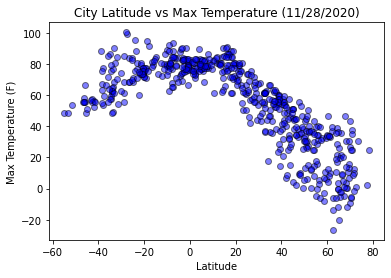

As we move away from the equator, the temperature decreases.


In [53]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")

plt.savefig("../images/LatitudeVsTemperaturePlot.png")
plt.show()
print("As we move away from the equator, the temperature decreases.")

## Latitude vs. Humidity Plot

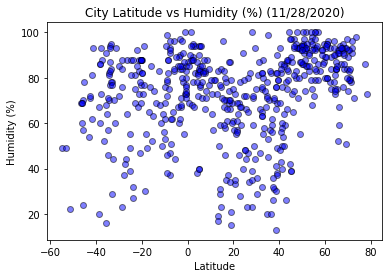

There is no relation between latitude and humidity.


In [55]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")

plt.savefig("../images/LatitudeVsHumidityPlot.png")
plt.show()
print("There is no relation between latitude and humidity.")

## Latitude vs. Cloudiness Plot

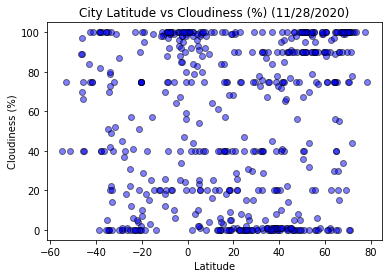

There is no relation between latitude and cloudiness.


In [56]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness (%) ({today})")

plt.savefig("../images/LatitudeVsCloudinessPlot.png")
plt.show()
print("There is no relation between latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

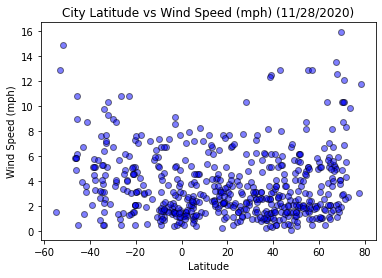

There is no relation between latitude and wind speed.


In [57]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed (mph) ({today})")

plt.savefig("../images/LatitudeVsWindSpeedPlot.png")
plt.show()
print("There is no relation between latitude and wind speed.")

## Linear Regression

In [44]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.16x + 90.48
The r-squared is: -0.8728855092945015
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


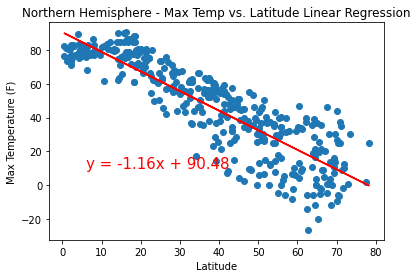

In [58]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("../images/NorthernMaxTempvsLatitudeRegression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.48x + 83.6
The r-squared is: 0.61287990574332
The regression displays a positive correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


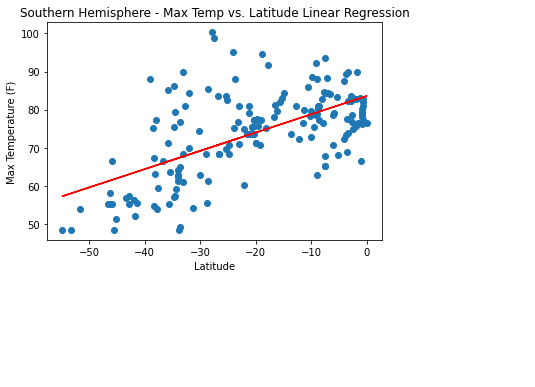

In [59]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("../images/SouthernMaxTempvsLatitudeRegression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.31x + 62.5
The r-squared is: 0.3187803103023064
The regression displays a slight positive correlation.
In the nothern hemisphere, as you move away from the equator the humidity increases.


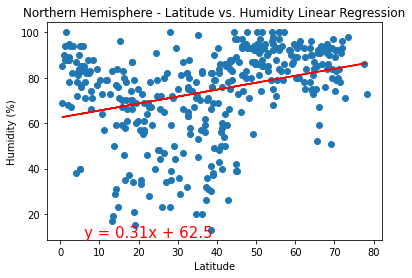

In [60]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Latitude vs. Humidity Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a slight positive correlation.")
print("In the nothern hemisphere, as you move away from the equator the humidity increases.")
plt.savefig("../images/NorthernHumidityvsLatitudeRegression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.3x + 77.51
The r-squared is: 0.23697387694020583
The regression displays a very slight positive correlation.
In the southern hemisphere, as you move away from the equator the humidity slightly decreases.


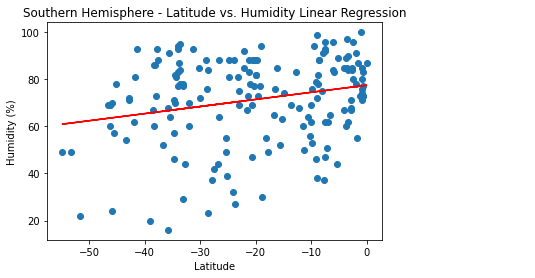

In [61]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Latitude vs. Humidity Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a very slight positive correlation.")
print("In the southern hemisphere, as you move away from the equator the humidity slightly decreases.")
plt.savefig("../images/SouthernHumidityvsLatitudeRegression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.44x + 36.14
The r-squared is: 0.22616927857437796
The regression displays a slight positive correlation.
In the nothern hemisphere, as you move away from the equator the cloudiness increases.


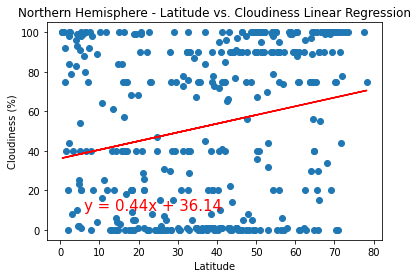

In [62]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Latitude vs. Cloudiness Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a slight positive correlation.")
print("In the nothern hemisphere, as you move away from the equator the cloudiness increases.")
plt.savefig("../images/NorthernCloudinessvsLatitudeRegression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.51x + 67.33
The r-squared is: 0.19532582436314777
The regression displays an extremely slight negative correlation.
In the southern hemisphere, as you move away from the equator the cloudiness slightly increases.


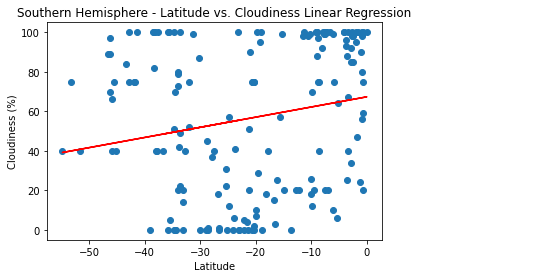

In [63]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Latitude vs. Cloudiness Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays an extremely slight negative correlation.")
print("In the southern hemisphere, as you move away from the equator the cloudiness slightly increases.")
plt.savefig("../images/SouthernCloudinessvsLatitudeRegression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 2.59
The r-squared is: 0.19483781830250768
The regression displays a slight positive correlation.
In the nothern hemisphere, as you move away from the equator the wind speed increases.


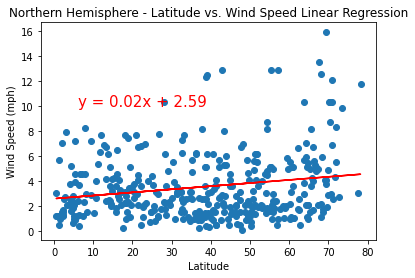

In [64]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Latitude vs. Wind Speed Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a slight positive correlation.")
print("In the nothern hemisphere, as you move away from the equator the wind speed increases.")
plt.savefig("../images/NorthernWindSpeedvsLatitudeRegression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.07x + 2.63
The r-squared is: -0.3579495715931812
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the wind speed increases.


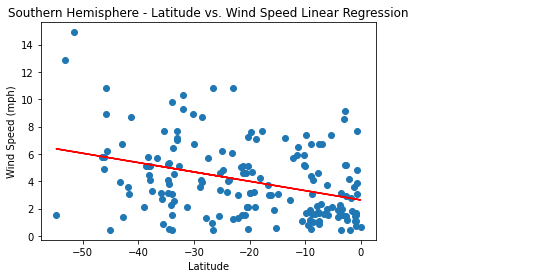

In [65]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Latitude vs. Wind Speed Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the wind speed increases.")
plt.savefig("../images/SouthernWindSpeedvsLatitudeRegression.png")
plt.show()